In [51]:
print("boi")
import pandas as pd
import numpy as np
import math
area = 0.0003211 #m
resistivity = 1.68*10**(-8) #ohm m
df1 = pd.read_csv("./ia.csv")
df2 = df1.drop(columns=["Diameter"])
df1['Average'] = df2.mean(numeric_only=True, axis=1)
df1['Standard Deviation'] = df2.std(axis=1)
df1['Power'] = ((df1['Average']**2)*area)/(resistivity * 30 * math.pi * (df1["Diameter"] * 0.001))
df1['Fit']=(2.08*10**8)/(1+2.7**(df1['Power']))
df1

boi


,Diameter,Trial 1,Trial 2,Trial 3,Trial 4,Trial 5,Average,Standard Deviation,Power,Fit
0,25.5,0.8,0.7,0.9,1.0,1.0,0.88,0.130384,6.158643e+03,0.0
1,32.0,18.0,18.5,18.2,19.0,18.4,18.42,0.376829,2.150251e+06,0.0
2,36.1,72.0,72.1,71.9,72.2,71.0,71.84,0.482701,2.899248e+07,0.0
3,41.2,154.0,153.0,155.0,159.0,160.0,156.20,3.114482,1.200949e+08,0.0
4,43.5,210.0,212.0,214.0,216.0,218.0,214.00,3.162278,2.135002e+08,0.0
5,45.9,215.0,216.0,217.0,218.0,219.0,217.00,1.581139,2.080495e+08,0.0


(0, 46.92734669885079)

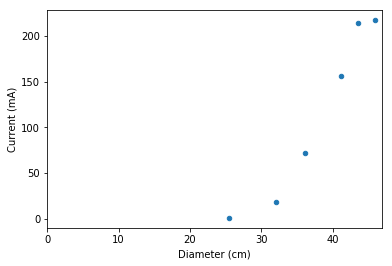

In [53]:
slope_equation = np.polyfit(df1["Diameter"],df1["Average"], 1)
slope = np.poly1d(slope_equation)
df1['Trendline'] = slope(df1["Diameter"])
ax=df1.plot.scatter(x="Diameter",y="Average")
ax.set_xlabel("Diameter (cm)")
ax.set_ylabel("Current (mA)")
ax.set_xlim(left=0)
#bx=df1.plot(ax=ax,x="Diameter",y="Trendline", yerr="Standard Deviation",title="Diameter vs Current")

[ 7.52967781e+05 -4.21366936e+07  5.81437964e+08]


(0, 46.92734669885079)

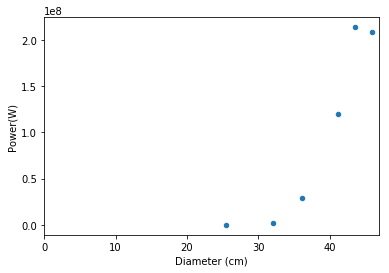

In [42]:
slope_equation = np.polyfit(df1["Diameter"],df1["Power"], deg=2)
print(slope_equation)
slope = np.poly1d(slope_equation)
df1['pTrendline'] = slope(df1["Diameter"])
ax=df1.plot.scatter(x="Diameter",y="Power")
ax.set_xlabel("Diameter (cm)")
ax.set_ylabel("Power(W)")
ax.set_xlim(left=0)
#bx=df1.plot(ax=ax,x="Diameter",y="pTrendline", title="Diameter vs Power")

[0. 0.]


(0, 46.92734669885079)

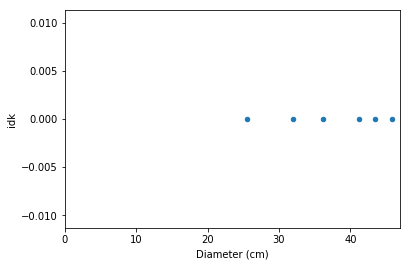

In [49]:
slope_equation = np.polyfit(df1["Diameter"],df1["Fit"], deg=1)
print(slope_equation)
slope = np.poly1d(slope_equation)
df1['fTrendline'] = slope(df1["Diameter"])
ax=df1.plot.scatter(x="Diameter",y="Fit")
ax.set_xlabel("Diameter (cm)")
ax.set_ylabel("idk")
ax.set_xlim(left=0)
#bx=df1.plot(ax=ax,x="Diameter",y="fTrendline", title="Diameter vs Fit")